<a href="https://colab.research.google.com/github/stkchan/projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data set from https://www.kaggle.com/pritsheta/house-price**

**date:**      Date house was sold

---



**price:**     Price is prediction target

---



**bedrooms:** Number of Bedrooms/House

---



**bathrooms:** Number of bathrooms/bedrooms

---



**sqft_living:** square footage of the home

---



**sqft_lot:** square footage of the lot

---



**floors :** Total floors (levels) in house

---



**waterfront :** House which has a view to a waterfront

---



**view:** Has been viewed

---



**condition :** How good the condition is Overall

---



**sqft_above :** square footage of house apart from basement

---



**sqft_basement:** square footage of the basement

---



**yr_built :** Built Year

---



**yr_renovated :** Year when house was renovated

---



# **IMPORT LIBRALIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Python version
version = sys.version
print(f"Python current version is {version}")

Python current version is 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


# **IMPORT DATA AND EXPLORE**

In [ ]:
#import data
path_file = "/content/sample_data/House-Price.csv"
data_original = pd.read_csv(path_file)
data_original.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1105,21-05-2014 0.00,220000.0,4,2.5,2160,8005,2.0,0,0,3,2160,0,1993,0,767 Oakhurst Dr,Pacific,WA 98047,USA
3043,23-06-2014 0.00,690000.0,2,1.0,970,4560,1.0,0,0,4,970,0,1907,0,4017 Corliss Ave N,Seattle,WA 98103,USA
1264,23-05-2014 0.00,945000.0,4,2.0,2840,13367,1.0,0,0,3,1420,1420,1952,2008,9723 NE 15th St,Clyde Hill,WA 98004,USA
423,09-05-2014 0.00,463000.0,2,1.0,1150,4400,1.0,0,0,4,1150,0,1905,0,401 31st Ave E,Seattle,WA 98112,USA
1840,04-06-2014 0.00,327500.0,3,1.0,1070,7140,1.0,0,0,3,1070,0,1989,0,3510 S Holly St,Seattle,WA 98118,USA


In [ ]:
#copy original_data
df = data_original.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

# **Cleaning Data**

In [ ]:
#Covert date to datetime format
df['date'] = pd.to_datetime(df.date, format = '%d-%m-%Y %H.%M')

In [ ]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [ ]:
#Create a new column 'age' = Age of Houses
df['age'] = 2021 - df['yr_built']

In [ ]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
4105,2014-07-08,390000.0000,3,1.75,1180,16552,1.0,0,0,4,1180,0,1967,0,16714 NE 158th St,Woodinville,WA 98072,USA,54
4482,2014-06-12,387884.6154,3,1.75,1590,8219,1.5,0,0,5,970,620,1938,0,12632 93rd Pl NE,Kirkland,WA 98034,USA,83
1768,2014-06-03,580135.0000,4,2.50,3150,5886,2.0,0,0,3,3150,0,2014,0,13516 164th Ave SE,Renton,WA 98059,USA,7
4320,2014-07-01,425000.0000,3,2.50,1950,5689,2.0,0,0,3,1950,0,2009,0,9416 Templeton Ave SE,Snoqualmie,WA 98065,USA,12
1976,2014-06-05,466800.0000,3,2.50,1480,14250,2.0,0,0,3,1480,0,1996,0,5811 116th Ave NE,Kirkland,WA 98033,USA,25


In [ ]:
#Remove columns
df = df.drop(['date', 'street', 'statezip', 'country'], axis = 1)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,age
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,66
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,100
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,55
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,58
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,67
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,38
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,12
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,47


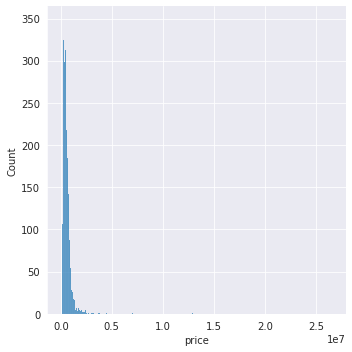

In [ ]:
sns.displot(df['price']);

In [ ]:
  #skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 24.790933
Kurtosis: 1044.352151


In [ ]:
#Create function to plot boxplot
def plot_boxplot(df, column):
    outlier = [column]
    plt.figure(figsize = (10, 8))
    #plt.rcParams['figure.figsize'] = [10,8]
    sns.set_style("whitegrid")
    sns.boxplot(data = df[outlier], orient="v", palette = 'Set3', saturation = 1, whis = 1.5, width = 0.9);
    plt.title("Outlier Variable Distribution", fontweight = 'bold', fontsize = 15)
    plt.ylabel("Price Range", fontweight = 'bold')

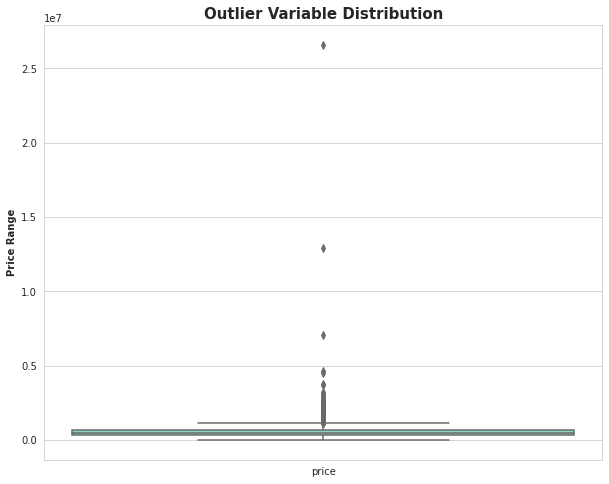

In [ ]:
plot_boxplot(df, 'price')

In [ ]:
  # Define function called 'outlier' which returns a list of index outliers
# IQR = Q3 - Q1
# +/- 1.5 *IQR
def outlier (data, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (data[col] < lower_bound) | (data[col] > upper_bound) ]

    return ls

In [ ]:
# create an empty list to store the output indices from multiple columns
index_list = []
for feature in ["price"]:
    index_list.extend(outlier(df, feature))

In [ ]:
index_list  

In [ ]:
#define a function called 'remove' which return a cleaned dataframe without outliers
def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
df_cleaned['price'].shape

(4360,)

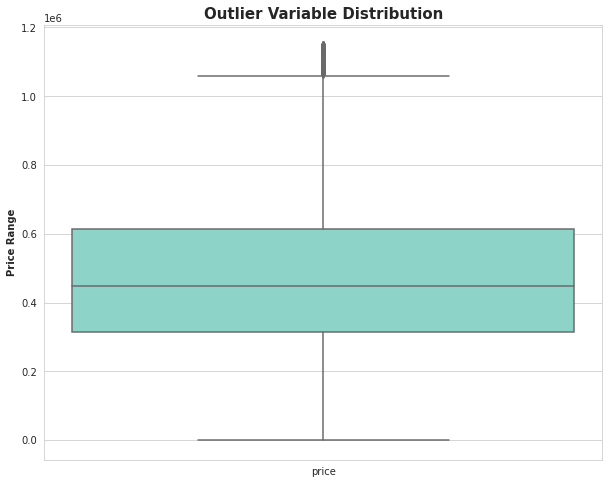

In [ ]:
plot_boxplot(df_cleaned, 'price')

In [ ]:
df_cleaned['price'].to_frame().sort_values(by = 'price' ,ascending = True)

,price
4358,0.0
4374,0.0
4487,0.0
4362,0.0
4361,0.0
...,...
233,1150000.0
2031,1150000.0
3946,1150000.0
1182,1150000.0


In [ ]:
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['price'] < 10000].index)

In [ ]:
df_cleaned['price'].to_frame().sort_values(by = 'price' ,ascending = True)

,price
1219,80000.0
1587,83000.0
4407,83300.0
4415,83300.0
4345,84350.0
...,...
3358,1150000.0
2031,1150000.0
3720,1150000.0
4082,1150000.0


In [ ]:
df_cleaned['price'].to_frame().sort_values(by = 'price' ,ascending = False)

,price
2031,1150000.0
3358,1150000.0
1182,1150000.0
4082,1150000.0
3946,1150000.0
...,...
4345,84350.0
4407,83300.0
4415,83300.0
1587,83000.0


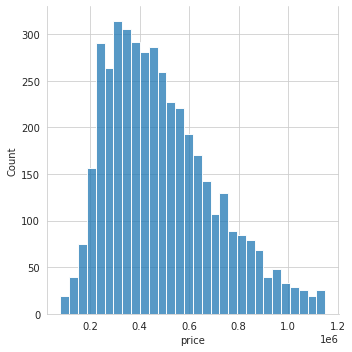

In [ ]:
sns.displot(df_cleaned['price']);

In [ ]:
#After clean outlier
print("Skewness: %f" % df_cleaned['price'].skew())
print("Kurtosis: %f" % df_cleaned['price'].kurt())

Skewness: 0.729912
Kurtosis: 0.035749


In [ ]:
df_cleaned.shape

(4310, 15)

# Exploratory Data Analysis


In [ ]:
df_cleaned['city'].value_counts(normalize = True)

Seattle                0.338979
Renton                 0.067517
Bellevue               0.053828
Redmond                0.052668
Issaquah               0.042459
Kent                   0.042459
Kirkland               0.040835
Auburn                 0.040603
Sammamish              0.038515
Federal Way            0.033643
Shoreline              0.028074
Woodinville            0.025754
Maple Valley           0.022042
Burien                 0.016705
Snoqualmie             0.016009
Kenmore                0.015081
Des Moines             0.013457
Mercer Island          0.011601
North Bend             0.011601
Duvall                 0.009745
Covington              0.009513
Lake Forest Park       0.007889
Bothell                0.007657
Newcastle              0.007193
Vashon                 0.006729
SeaTac                 0.006497
Enumclaw               0.006265
Tukwila                0.006265
Carnation              0.004872
Normandy Park          0.003712
Fall City              0.002088
Black Di

In [ ]:
df_cleaned['city'].value_counts(normalize = True).index

Index(['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kent',
       'Kirkland', 'Auburn', 'Sammamish', 'Federal Way', 'Shoreline',
       'Woodinville', 'Maple Valley', 'Burien', 'Snoqualmie', 'Kenmore',
       'Des Moines', 'Mercer Island', 'North Bend', 'Duvall', 'Covington',
       'Lake Forest Park', 'Bothell', 'Newcastle', 'Vashon', 'SeaTac',
       'Enumclaw', 'Tukwila', 'Carnation', 'Normandy Park', 'Fall City',
       'Black Diamond', 'Ravensdale', 'Pacific', 'Algona', 'Clyde Hill',
       'Skykomish', 'Preston', 'Milton', 'Yarrow Point', 'Beaux Arts Village',
       'Snoqualmie Pass', 'Medina', 'Inglewood-Finn Hill'],
      dtype='object')

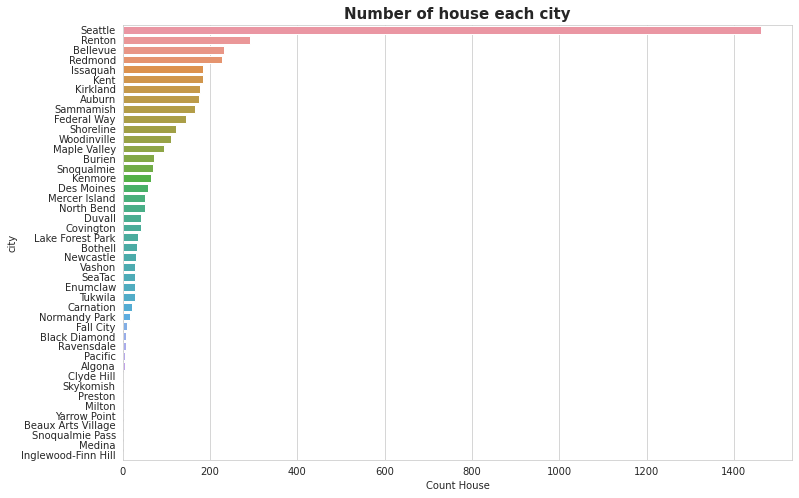

In [ ]:
  #plot graph Number House of City
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')
sns.countplot(y = 'city',
              data = df_cleaned,
              order = df_cleaned['city'].value_counts().index)
plt.xlabel("Count House")
plt.title("Number of house each city", fontweight = 'bold', fontsize = 15)
plt.show()

In [ ]:
df_cleaned['floors'].value_counts().to_frame()

,floors
1.0,2105
2.0,1640
1.5,415
3.0,120
2.5,28
3.5,2


In [ ]:
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['floors'] > 2].index)

In [ ]:
df_cleaned['floors'].value_counts().to_frame().index

Float64Index([1.0, 2.0, 1.5], dtype='float64')

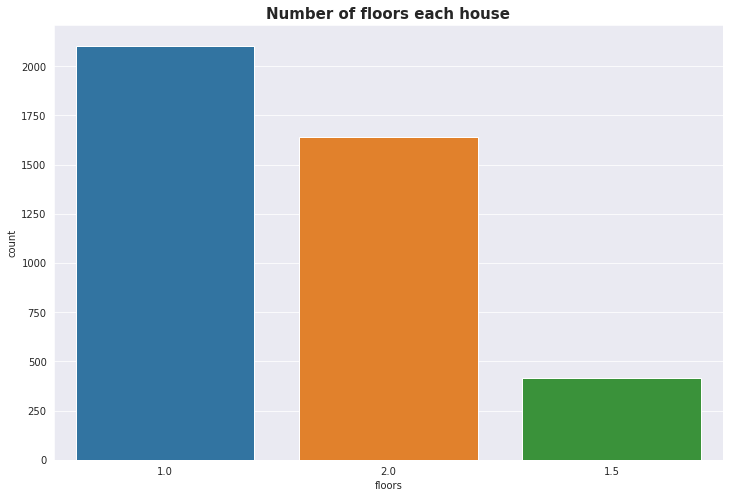

In [ ]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(x = 'floors', 
              data = df_cleaned,
              order = df_cleaned['floors'].value_counts().to_frame().index)
plt.title("Number of floors each house", fontweight = 'bold', fontsize = 15);

In [ ]:
df_cleaned['bedrooms'].value_counts().to_frame()

,bedrooms
3,1878
4,1376
2,538
5,277
6,44
1,36
7,10
8,1


In [ ]:
df_cleaned.drop(df_cleaned[(df_cleaned['bedrooms'] > 5) | (df_cleaned['bedrooms'] == 1) | (df_cleaned["bedrooms"] == 0)].index, inplace = True)

In [ ]:
df_cleaned['bedrooms'].value_counts().to_frame().index

Int64Index([3, 4, 2, 5], dtype='int64')

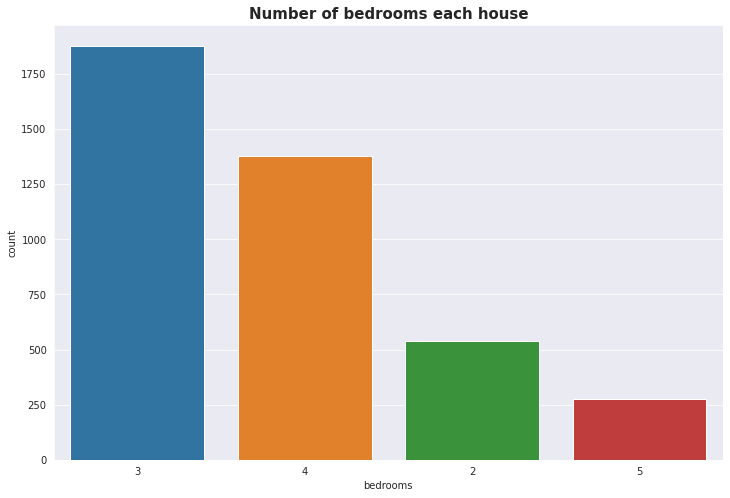

In [ ]:
plt.figure(figsize = (12, 8))
sns.set_style("darkgrid")
sns.countplot(x = df_cleaned['bedrooms'],
              data = df_cleaned,
              order = df_cleaned['bedrooms'].value_counts().to_frame().index)
plt.title("Number of bedrooms each house", fontweight = 'bold', fontsize = 15);

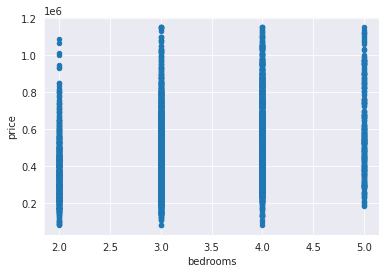

In [ ]:
#Relationship between bedrooms and price
room = 'bedrooms'
data = pd.concat([df_cleaned['price'],
                 df_cleaned[room]],
                 axis = 1)
data.plot.scatter(x = room,
                  y = 'price');

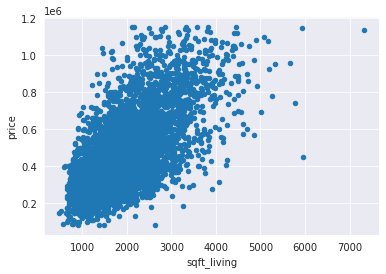

In [ ]:
#Relationship between bedrooms and sqft_living
living = 'sqft_living'
data = pd.concat([df_cleaned['price'],
                  df_cleaned[living]],
                 axis = 1)
data.plot.scatter(x = living,
                  y = 'price');

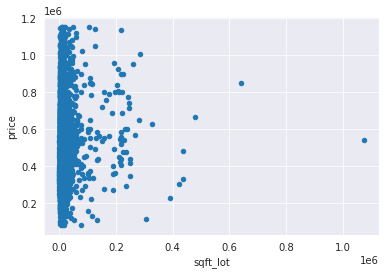

In [ ]:
#Relationship between bedrooms and sqft_lot
lot = 'sqft_lot'
data = pd.concat([df_cleaned['price'],
                  df_cleaned[lot]],
                 axis = 1)
data.plot.scatter(x = lot,
                  y = 'price');

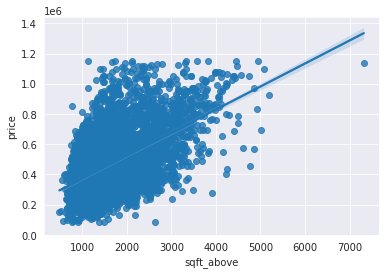

In [ ]:
#Relationship between bedrooms and sqft_above
sns.regplot(x="sqft_above", y="price", data=df_cleaned)
plt.ylim(0,);

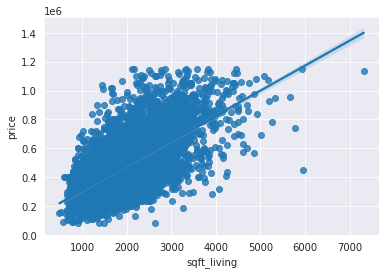

In [ ]:
#Relationship between bedrooms and sqft_living
sns.regplot(x="sqft_living", y="price", data=df_cleaned)
plt.ylim(0,);

In [ ]:
correlation = df_cleaned.corr()

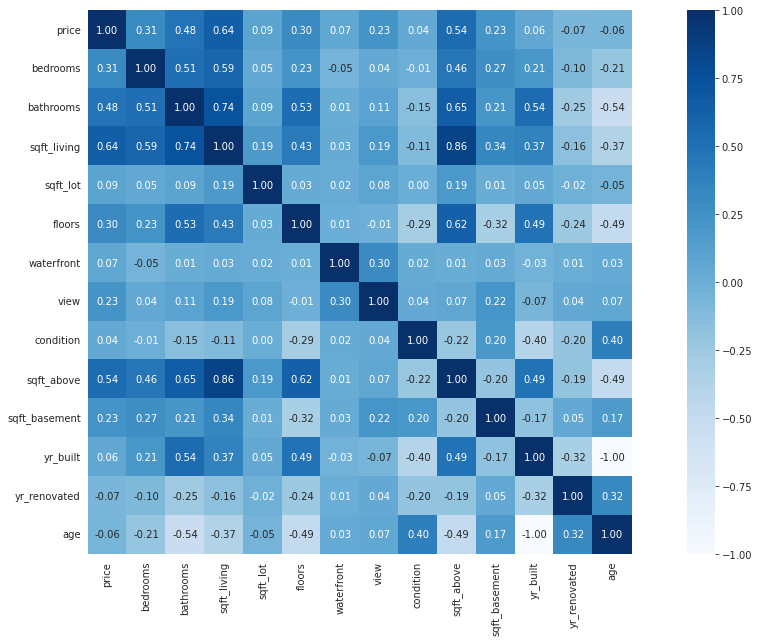

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size': 10}, cmap = 'Blues');

# **Data prep**

In [ ]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
#OneHotEncoding
df_one = pd.get_dummies(df_cleaned)
df_one.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,age,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# #Standardize
# std = StandardScaler()
# df_one_std = std.fit_transform(df_one)
# df_one_std = pd.DataFrame(df_one_std, columns = df_one.columns)

# print(df_one_std['sqft_above'].nlargest(10))
# print(df_one_std['sqft_above'].nsmallest(10))

In [ ]:
# df_one_std.drop(df_one_std[df_one_std['sqft_above'] > 5].index, inplace = True)

In [ ]:
# print(df_one_std['sqft_above'].nlargest(10))
# print(df_one_std['sqft_above'].nsmallest(10))

# *Train Test Split*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_one.drop(['price'], axis = 1)
Y = df_one['price'] 

In [ ]:
print(X)
print(Y)

      bedrooms  bathrooms  ...  city_Woodinville  city_Yarrow Point
0            3       1.50  ...                 0                  0
2            3       2.00  ...                 0                  0
3            3       2.25  ...                 0                  0
4            4       2.50  ...                 0                  0
5            2       1.00  ...                 0                  0
...        ...        ...  ...               ...                ...
4595         3       1.75  ...                 0                  0
4596         3       2.50  ...                 0                  0
4597         3       2.50  ...                 0                  0
4598         4       2.00  ...                 0                  0
4599         3       2.50  ...                 0                  0

[4069 rows x 57 columns]
0       313000.0000
2       342000.0000
3       420000.0000
4       550000.0000
5       490000.0000
           ...     
4595    308166.6667
4596    534333.333

In [ ]:
#train_test_split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [ ]:
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"Y_train : {Y_train.shape}")
print(f"Y_test : {Y_test.shape}")

X_train : (3255, 57)
X_test : (814, 57)
Y_train : (3255,)
Y_test : (814,)


# **Model Training**

In [ ]:
#Import libraries
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
r2 = []
model = []
RMSE = []
reg = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), XGBRegressor()]
for tar in reg:
    model_name = type(tar).__name__
    tar.fit(X_train, Y_train)
    predict = tar.predict(X_test)
    r2.append(r2_score(Y_test, predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(Y_test, predict, squared = False))
models = pd.DataFrame({"Model": model, 'R2' : r2, 'RMSE' : RMSE})
print(models)

[06:16:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                 Model        R2           RMSE
0     LinearRegression  0.723168  111569.817671
1                Ridge  0.723608  111480.933263
2                Lasso  0.723201  111563.069782
3  KNeighborsRegressor  0.385250  166259.886685
4         XGBRegressor  0.723119  111579.514363


# **Model Linear**

In [ ]:
#linearRegression

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Intercept
print(reg.intercept_)

764472.5817379917


In [ ]:
coeffcients = pd.DataFrame([X_train.columns,reg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'}).sort_values(by = 'Coefficients', ascending = False)
coeffcients

,Attribute,Coefficients
21,city_Clyde Hill,461947
15,city_Beaux Arts Village,384022
36,city_Mercer Island,251424
16,city_Bellevue,193564
44,city_Redmond,152341
32,city_Kirkland,126422
46,city_Sammamish,124882
5,waterfront,113999
48,city_Seattle,111643
38,city_Newcastle,94615.5


In [ ]:
#prediction on training data
Y_pred = reg.predict(X_test) 

In [ ]:
print_evaluate(Y_test, Y_pred)

MAE: 79851.33518444476
MSE: 12447824215.161888
RMSE: 111569.81767109726
R2 Square 0.7231675723609403
__________________________________


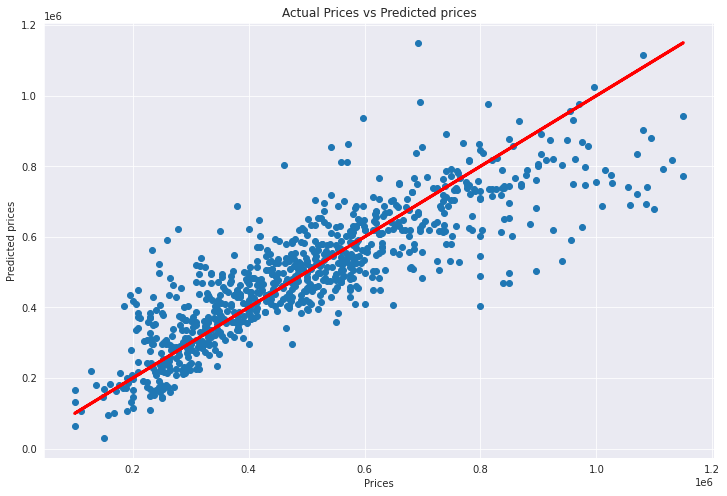

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(Y_test, Y_pred)
plt.plot(Y_test, Y_test,color='red', linewidth=3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()